# Facility Location demo

Outline:
1. Data
2. Model
3. Analysis

Input:
Output:


# Data
Two dataset is considered in this project:
1. Geolocation and population density of 3887 cities in mainland USA
2. A shapefile that contains geospatial properties of cities

In [1]:
# import custom functions related to our model
import model1, model2
import data_preparation, data_visualization
# import libraries
import pandas as pd
import geopandas
from geopy import distance

## Data Collection and Cleaning
Assumption: It is assumed that demand is directly proportional to population density. Let's explore city-wise density

In [2]:
data_demand = pd.read_excel("Data/Major city data.xlsx")
# geo_data = ...

In [3]:
# Show the data map (input of the model)
data_demand = data_demand[['NAME', 'ST', 'POPULATION', 'longitude', 'latitude']]
data_demand.head()

,NAME,ST,POPULATION,longitude,latitude
0,Ammon,ID,15181,-111.954,43.4758
1,Blackfoot,ID,11946,-112.346,43.1939
2,Boise City,ID,225405,-116.230,43.5990
3,Burley,ID,10727,-113.793,42.5367
4,Caldwell,ID,53942,-116.686,43.6616


In [4]:
facility, customer_df = data_preparation.data_prep(data_demand)
facility_coord = facility['facility_coord']
customer_coord = customer_df['customer_coord']

C:\Users\tanmo\OneDrive - Dalhousie University\Data Science portfolio 2023\Location allocation project\facility-location\data_preparation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facility.drop("index", axis=1, inplace=True)


In [5]:
facility_show = facility[['warehouse_id', 'NAME', 'ST', 'POPULATION','geometry']]
facility_show.columns = ['ID', 'Name', 'State', 'Population', 'Geometry']
display(facility_show.style.hide(axis='index'))
facility_show.to_csv('Outputs/facility_show.csv', index=False)

ID,Name,State,Population,Geometry
Warehouse 1,Chicago,IL,2781116,POINT (-87.6471 41.7565)
Warehouse 2,San Francisco,CA,871042,POINT (-122.442 37.7669)
Warehouse 3,Atlanta,GA,464043,POINT (-84.3949 33.7486)
Warehouse 4,New York,NY,8691599,POINT (-74.0101 40.7106)
Warehouse 5,Dallas,TX,1323651,POINT (-96.7958 32.7786)


## Mainland USA and its demands

### Plot customer and warehouse

In [6]:
import data_visualization

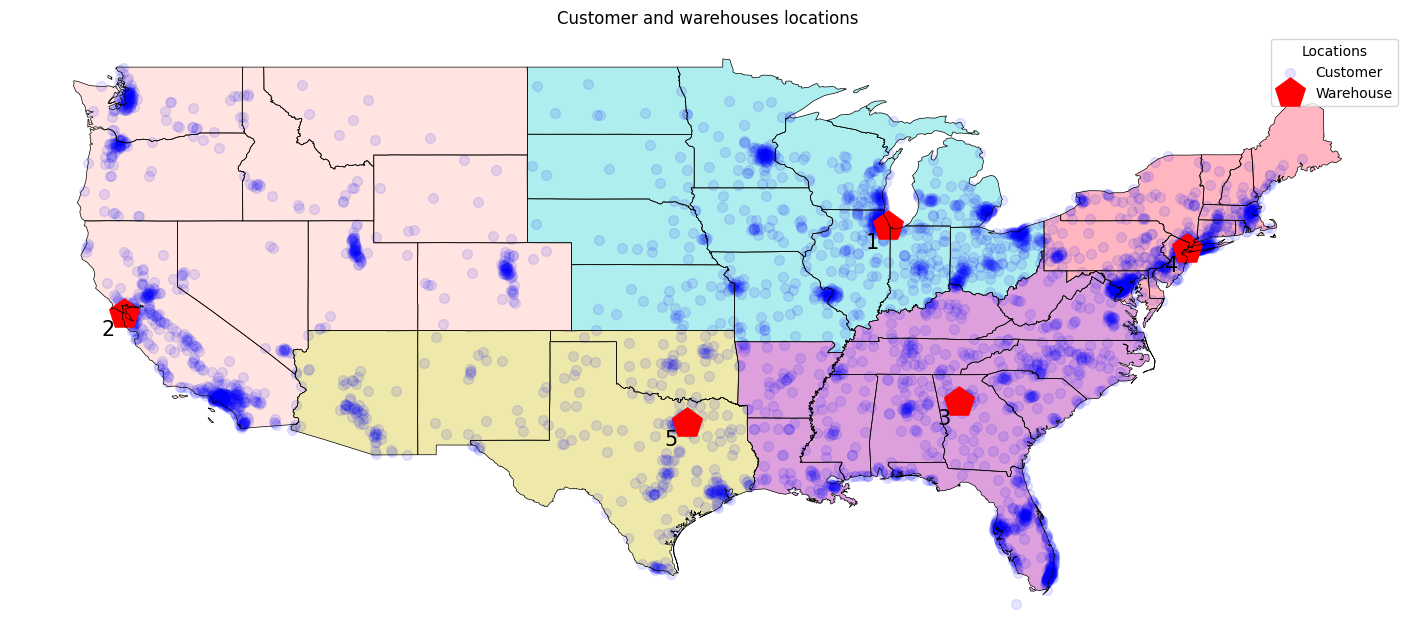

In [7]:

# Load geometric file for map
AllSt = geopandas.read_file("Data/States_shapefile/States_shapefile.shp")
# remove 2 states from map
indexNames = AllSt[AllSt['State_Code'].isin(['AK', 'HI'])].index
AllSt.drop(indexNames, inplace=True)

# draw geomap
data_visualization.draw_initial_customer_demand(AllSt, facility, customer_df) 

## Input Parameters of the model

In [8]:
# Input parameters
I = [i for i in range(0, 3849)] # need to replace this hard-coded value ++
J = [j for j in range(0, 5)]  # ++


p = round(customer_df['POPULATION'])

A = [(i,j) for i in I for j in J]                                   # Arc between pharma and census
d_ij = {(i,j): distance.geodesic(customer_coord[i], facility_coord[j]).miles for i, j in A }  # Distance between pharma and census

# we want to choose 4 from 5 warehouse
N = 4

# Modeling

## Model 1

In [9]:
import model1
# Show the model equation
lpfile, attrfile, decision_df = model1.solve(I, J, p, d_ij, N)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3850 rows, 3854 columns and 23094 nonzeros
Model fingerprint: 0x2b025e93
Variable types: 0 continuous, 3854 integer (3854 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+03]
  Objective range  [8e+03, 9e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+00, 4e+00]
Found heuristic solution: objective 1.958770e+08

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 1.95877e+08 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.958770450000e+08, best bound 1.958770450000e+08, gap 0.0000%


AttributeError: 'gurobipy.Model' object has no attribute 'log'

## Model 2
Weiszfelf method

In [ ]:
#Take each of 5 warehouse lat and lon
warehouse_coord5=[]
for i in range (len(facility)):
   # print(i)
    lat = facility["latitude"][i]
    lon = facility["longitude"][i]
    warehouse_coord5.append([lon, lat])


points = [tuple(x) for x in warehouse_coord5]
lon=np.array([point[0] for point in  points])  # ++
lat=np.array([point[1] for point in  points])

max_error = 0.0000000001
ext_condition = True

In [ ]:
input_data_model2 = warehouse_coord5, lon, lat

# Analysis

In [ ]:
# decision to open or close warehouse
decision = []
for var in mdl.getVars():
    if "x" in var.varName:
        if var.xn > 0:
            decision.append("yes")
        else:
            decision.append("no")


decision_df = pd.DataFrame(decision, columns=["decisions"])
facility_close = pd.concat([facility, decision_df], axis=1)
# Close NY warehouse
facility_close.head()

## Resource optimization


In [ ]:
data_visualization.draw_open_close_facility(AllSt, facility, customer_df)

## Final Geographic map showing optimized allocation of facilities